In [4]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [5]:
# Import dataset

df = pd.read_csv("car_evaluation.csv", header=None)


In [6]:
# Exploratory data analysis
df.shape

(1728, 7)

In [7]:
#View top 5 rows of dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
#Rename column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [9]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
#View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
#Frequency distribution of values in variables

for col in col_names:

    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
#Summary of variables

#There are 7 variables in the dataset.
#These are given by buying, maint, doors, persons, lug_boot, safety and class.
#class is the target variable.

In [13]:
# Explore class variable
df['class'].value_counts()

#The class target variable is ordinal in nature.
#An ordinal variable is a categorical variable for which the possible values are ordered. Ordinal variables can be considered “in between” categorical and quantitative variables

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
# Missing values in variables
# check missing values in variables

df.isnull().sum()

#We can see that there are no missing values in the dataset.
#I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
#Declare feature vector and target variable
X = df.drop(['class'], axis=1)

y = df['class']

In [16]:
# Split data into separate training and test set
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [17]:
# Feature Engineering
#Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

#First, I will check the data types of variables again.

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [18]:
# Encode categorical variables
#Now, I will encode the categorical variables.

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [57]:
# For example, if you have 'low', 'middle', 'high' as values of categorical variable, it's reasonable to treat it as ordinals and encode it as 1, 2, 3. So, if algorithm splits the variable, and {1} goes to one branch and {2,3} to the other, it'd reasonable because 'middle' and 'high' are clearly separated from 'low' and they can form two different categories.

#But if the values are 'spoon', 'fork', 'knife', it doesn't make sense to encode it as numbers, because tree algorithm would split the numerical value of the variable and it doesn't make sense why 'knife' and 'fork' should go to one branch and 'spoon' to the other. But that would be the case, if they are encoded as 1, 2, 3 and the it's split as {1} in one branch and {2, 3} in the other. So, in this case it's better to one-hot encode them. This way algorithm would treat them as non-sequential binary variables and they would have the same chance to fall into one separate branch with each other.

In [19]:
# import category encoders
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [20]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Label encoding assigns a unique numerical label to each unique category in a categorical variable. For example, if you have a "Size" feature with categories "Small," "Medium," and "Large," label encoding would assign the labels 0, 1, and 2 to these categories, respectively. Label encoding does not imply any inherent order or magnitude among the categories.

On the other hand, ordinal encoding is used when the categories in a categorical variable have a natural order or hierarchy. Ordinal encoding assigns numerical labels to the categories based on their order. For example, if you have an "Education Level" feature with categories "High School," "Bachelor's Degree," and "Master's Degree," you can assign the labels 0, 1, and 2, respectively, based on their hierarchical order.

In summary, label encoding assigns unique labels to each category without considering any order, while ordinal encoding assigns numerical labels based on the inherent order or hierarchy of the categories.








Fit: It analyzes the training data (X_train) to learn the necessary information for the encoding.

For OrdinalEncoder, this means determining the unique categories in each specified column and assigning them integer values based on their order.
The encoder stores this learned information internally.
Transform: It applies the learned encoding to the training data (X_train), replacing the categorical values with their corresponding numerical codes. It returns the transformed data.

In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [22]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
#clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

#clf.fit(X_train, y_train)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

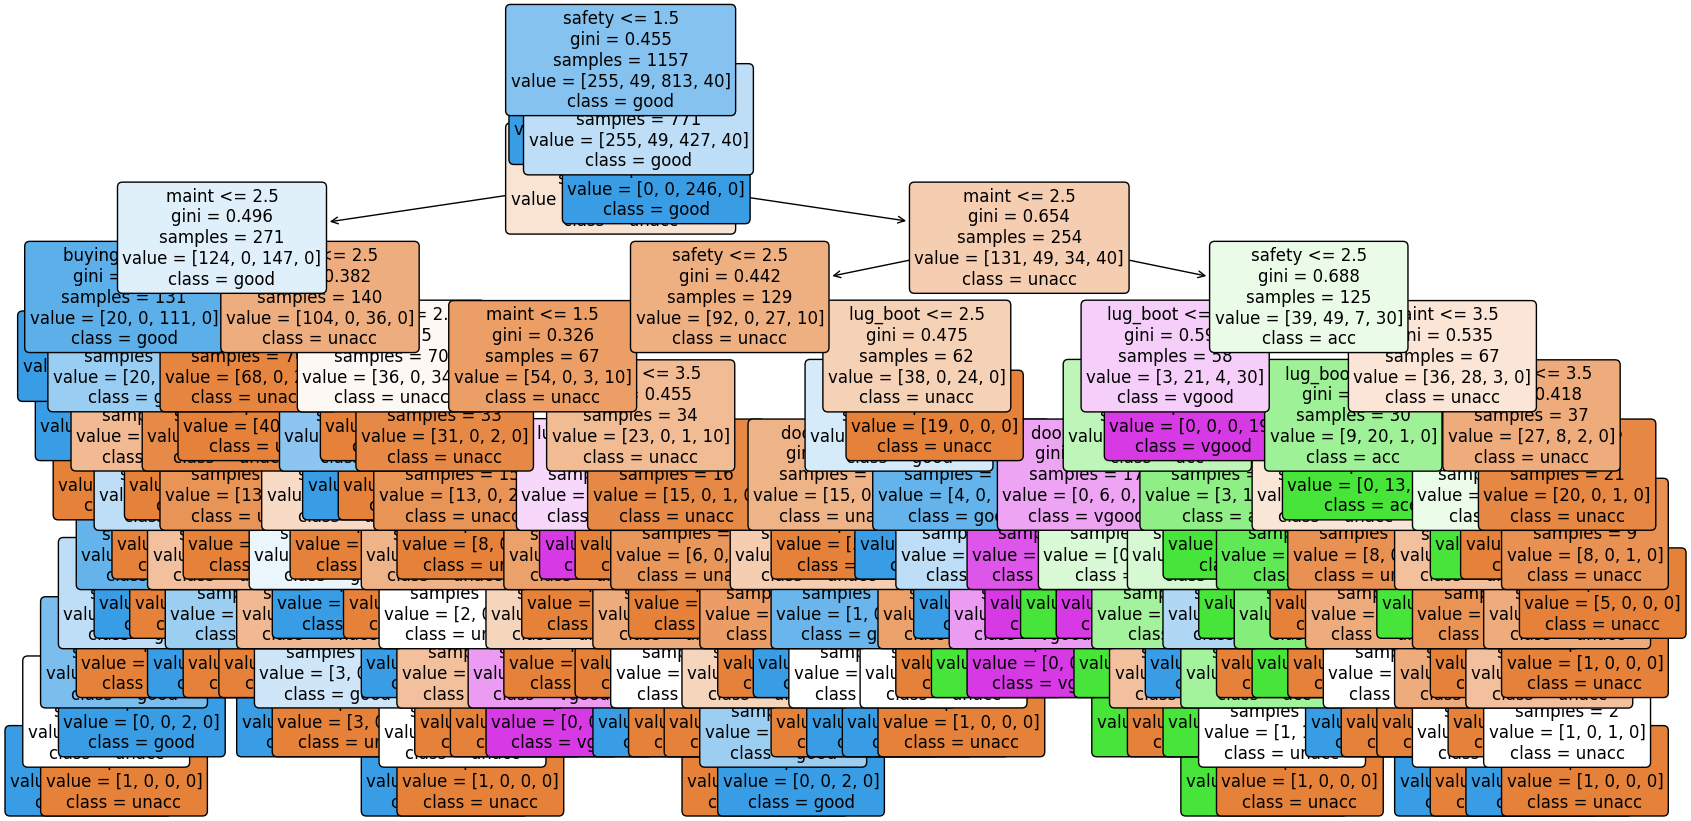

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# ... (Your code to create the decision tree model clf)

# Adjust figure size as needed
plt.figure(figsize=(20, 10))

# Plot the tree, using class names and feature names from your data
plot_tree(
    clf,
    feature_names=X.columns,  # Get feature names directly from your DataFrame
    class_names=['unacc', 'acc', 'good', 'vgood'],
    filled=True,            # Fill nodes with colors based on majority class
    rounded=True,           # Rounded corners for nodes
    fontsize=12,            # Adjust font size for readability
    label="all"             # Display impurity, samples, and value at each node
)

plt.show()  # Display the plot


In [26]:
from sklearn.tree import export_text

# Assuming you have your trained decision tree classifier in 'clf' and
# your feature names in 'X.columns'

tree_rules = export_text(
    clf, feature_names=list(X.columns), show_weights=True
)
print(tree_rules)



|--- safety <= 1.50
|   |--- weights: [0.00, 0.00, 386.00, 0.00] class: unacc
|--- safety >  1.50
|   |--- persons <= 2.50
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- buying <= 1.50
|   |   |   |   |   |--- weights: [0.00, 0.00, 70.00, 0.00] class: unacc
|   |   |   |   |--- buying >  1.50
|   |   |   |   |   |--- maint <= 1.50
|   |   |   |   |   |   |--- weights: [0.00, 0.00, 32.00, 0.00] class: unacc
|   |   |   |   |   |--- maint >  1.50
|   |   |   |   |   |   |--- safety <= 2.50
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00, 0.00, 0.00] class: acc
|   |   |   |   |   |   |--- safety >  2.50
|   |   |   |   |   |   |   |--- lug_boot <= 2.50
|   |   |   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |   |   |--- doors <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- doors <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- doors >  2.

In [27]:

# Predict on the test set results

y_pred = clf.predict(X_test)


from sklearn.metrics import accuracy_score
# Check accuracy score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_pred, y_test)))

Model accuracy score with doors variable removed : 0.9475


In [28]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Create pandas dataframe from confusion matrix, replacing labels
class_names = ['unacc', 'acc', 'good', 'vgood']
cm_df = pd.DataFrame(
    cm,
    index = ['Actual ' + class_name for class_name in class_names],
    columns = ['Predicted ' + class_name for class_name in class_names]
)

print('Confusion Matrix:\n\n', cm_df)

Confusion Matrix:

               Predicted unacc  Predicted acc  Predicted good  Predicted vgood
Actual unacc              109             11               8                1
Actual acc                  0             19               0                1
Actual good                 4              0             393                0
Actual vgood                3              2               0               20


In [74]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test ))

              precision    recall  f1-score   support

         acc       0.57      0.56      0.56       130
        good       0.00      0.00      0.00         0
       unacc       0.97      0.87      0.92       441
       vgood       0.00      0.00      0.00         0

    accuracy                           0.80       571
   macro avg       0.38      0.36      0.37       571
weighted avg       0.88      0.80      0.84       571



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#Random Forest Classifier model with default parameters

# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


In [76]:
# Random Forest Classifier model with parameter n_estimators=100

# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))
#Model accuracy score with 100 decision-trees : 0.9457

Model accuracy score with 100 decision-trees : 0.9457


In [77]:
# Find important features with Random Forest model

# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [78]:
# Now, I will use the feature importance variable to see feature importance scores.

# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

#We can see that the most important feature is safety and least important feature is doors.

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

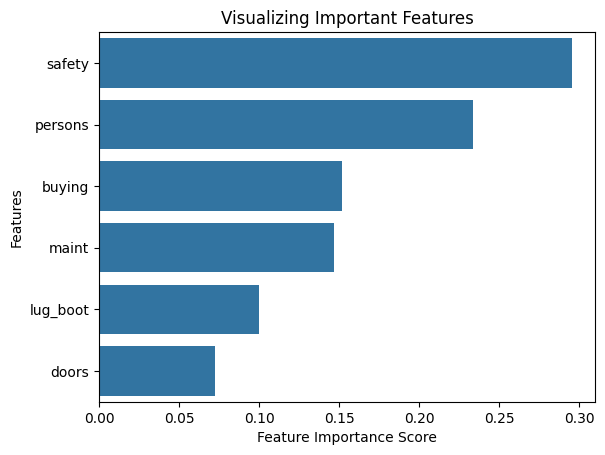

In [79]:
 #Visualize feature scores of the features

 #Now, I will visualize the feature scores with matplotlib and seaborn.

 # Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [80]:
# Build Random Forest model on selected features

# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [81]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [82]:
# Now, I will build the random forest model and check accuracy.

# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [83]:
# instantiate the classifier with n_estimators = 100

#n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


In [84]:
# I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with doors variable removed from the model.

#Furthermore, the second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

In [85]:
# Confusion matrix

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


In [86]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Create pandas dataframe from confusion matrix, replacing labels
class_names = ['unacc', 'acc', 'good', 'vgood']
cm_df = pd.DataFrame(
    cm,
    index = ['Actual ' + class_name for class_name in class_names],
    columns = ['Predicted ' + class_name for class_name in class_names]
)

print('Confusion Matrix:\n\n', cm_df)



Confusion Matrix:

               Predicted unacc  Predicted acc  Predicted good  Predicted vgood
Actual unacc              104             12              10                3
Actual acc                  0             18               0                2
Actual good                10              0             387                0
Actual vgood                3              2               0               20


In [87]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test ))

              precision    recall  f1-score   support

         acc       0.81      0.89      0.85       117
        good       0.90      0.56      0.69        32
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.87      0.81      0.83       571
weighted avg       0.93      0.93      0.92       571



Definitions:

True Positive (TP): A true positive occurs when your model correctly predicts a positive class (in this case, correctly identifying a car as belonging to a particular category). In your table, the diagonal cells represent true positives.

Example: When your model predicts a car is "unacc" and it actually is "unacc".
False Negative (FN): A false negative occurs when your model incorrectly predicts a negative class when the actual class is positive (it misses a car that should have been classified in a certain category).

Example: When your model predicts a car is "acc" but it actually is "unacc".
False Positive (FP): A false positive occurs when your model incorrectly predicts a positive class when the actual class is negative (it incorrectly assigns a car to a category it doesn't belong to).

Example: When your model predicts a car is "good" but it actually is "unacc".